# Models - Adapted algorithms

**Algorithms used:**

* **Neural network**

  Neural network models can be configured to support multi-label classification in the following way:
    * Number of nodes in the output layer matches the number of labels.
    * Sigmoid activation for each node in the output layer.
    * Binary cross-entropy loss function.

## Necessary downloads and library imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
project_path = '/content/drive/My Drive/Colab Notebooks/MATF_ML_project/'

In [3]:
!pip install scikit-multilearn
!pip install ipynb

In [4]:
from ipynb.fs.full.utility import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import pickle
import time
import datetime

from scipy import sparse

import skmultilearn
from skmultilearn.model_selection import iterative_train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

import sklearn.metrics as metrics

## Load data

In [5]:
X_train_vect_concat = sparse.load_npz(project_path + 'data/X_train_vect_concat.npz')
y_train_vect_concat = sparse.load_npz(project_path + 'data/y_train_vect_concat.npz')
X_test_vect_concat = sparse.load_npz(project_path + 'data/X_test_vect_concat.npz')
y_test_vect_concat = sparse.load_npz(project_path + 'data/y_test_vect_concat.npz')

In [6]:
X_train_concat_vect = sparse.load_npz(project_path + 'data/X_train_concat_vect.npz')
y_train_concat_vect = sparse.load_npz(project_path + 'data/y_train_concat_vect.npz')
X_test_concat_vect = sparse.load_npz(project_path + 'data/X_test_concat_vect.npz')
y_test_concat_vect = sparse.load_npz(project_path + 'data/y_test_concat_vect.npz')

In [7]:
X_train_vect_concat.shape, y_train_vect_concat.shape, X_test_vect_concat.shape, y_test_vect_concat.shape

((6051, 15348), (6051, 100), (1577, 15348), (1577, 100))

In [8]:
X_train_concat_vect.shape, y_train_concat_vect.shape, X_test_concat_vect.shape, y_test_concat_vect.shape

((6062, 9110), (6062, 100), (1566, 9110), (1566, 100))

## Train - Validation - Test

In [9]:
X_train_vect_concat, y_train_vect_concat, X_val_vect_concat, y_val_vect_concat = iterative_train_test_split(X_train_vect_concat.toarray(), 
                                                                                          y_train_vect_concat.toarray(), 
                                                                                          test_size = 0.2)

In [10]:
X_train_vect_concat.shape, y_train_vect_concat.shape, X_val_vect_concat.shape, y_val_vect_concat.shape, X_test_vect_concat.shape, y_test_vect_concat.shape

((4769, 15348),
 (4769, 100),
 (1282, 15348),
 (1282, 100),
 (1577, 15348),
 (1577, 100))

In [11]:
X_train_concat_vect, y_train_concat_vect, X_val_concat_vect, y_val_concat_vect = iterative_train_test_split(X_train_concat_vect.toarray(), 
                                                                                          y_train_concat_vect.toarray(), 
                                                                                          test_size = 0.2)

In [12]:
X_train_concat_vect.shape, y_train_concat_vect.shape, X_val_concat_vect.shape, y_val_concat_vect.shape, X_test_concat_vect.shape, y_test_concat_vect.shape

((4770, 9110),
 (4770, 100),
 (1292, 9110),
 (1292, 100),
 (1566, 9110),
 (1566, 100))

## Models

In [13]:
model_vect_concat, history_vect_concat = Sequential_compile_train(X_train_vect_concat, y_train_vect_concat, (X_val_vect_concat, y_val_vect_concat), verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              15349000  
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
Total params: 15,909,700
Trainable params: 15,909,700
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_concat_vect, history_concat_vect = Sequential_compile_train(X_train_concat_vect, y_train_concat_vect, (X_val_concat_vect, y_val_concat_vect), verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              9111000   
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
Total params: 9,671,700
Trainable params: 9,671,700
Non-trainable params: 0
_________________________________________________________________


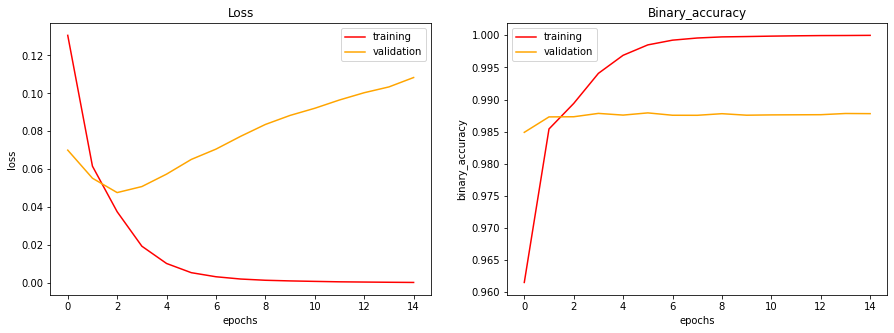

In [15]:
plot_training_histroy(history_vect_concat)

In [16]:
predicted_prob = model_vect_concat.predict(X_val_vect_concat)
predicted = predicted_prob.round()
print_metrics(predicted, y_val_vect_concat)

Hamming Score ('Accuracy' by Keras):	98.780
Hamming Score (= 1 - Hamming Loss):	98.780
Exact match ratio (Subset Accuracy):	22.075
F1-Score Micro Averaged:		46.694
F1-Score Macro Averaged:		34.211
F1-Score Weighted Average:		51.719
Precision Score Micro Averaged:		35.364
Recall Score Micro Averaged:		68.706


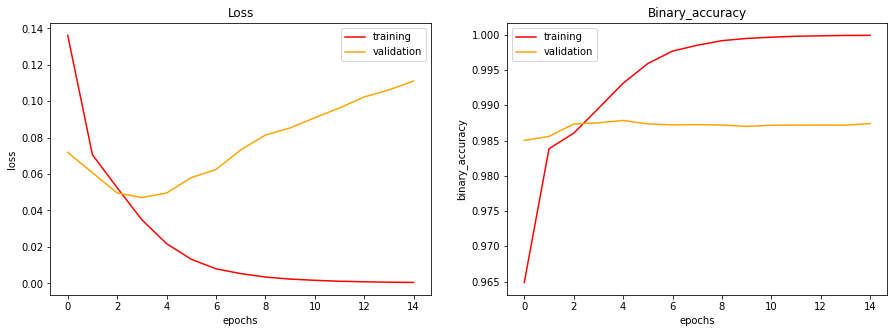

In [17]:
plot_training_histroy(history_concat_vect)

In [18]:
predicted_prob = model_concat_vect.predict(X_val_concat_vect)
predicted = predicted_prob.round()
print_metrics(predicted, y_val_concat_vect)

Hamming Score ('Accuracy' by Keras):	98.741
Hamming Score (= 1 - Hamming Loss):	98.741
Exact match ratio (Subset Accuracy):	21.362
F1-Score Micro Averaged:		47.702
F1-Score Macro Averaged:		34.618
F1-Score Weighted Average:		51.581
Precision Score Micro Averaged:		38.307
Recall Score Micro Averaged:		63.203
